In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats

In [6]:
from scipy.stats import chi2_contingency

In [7]:
from scipy.stats import shapiro

In [8]:

from scipy.stats import spearmanr

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
import matplotlib.pyplot as plt

In [15]:
sns.set()

In [16]:
df = pd.read_csv("C:/Users/anant/OneDrive/SEMESTER 6/Data Mining/historical_automobile_sales.csv")

In [17]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [18]:
df.shape

(528, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [20]:
missing_counts = df.isnull().sum()

In [21]:
print(missing_counts)

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64


In [22]:
df.dropna(inplace=True)

In [23]:
print(df.duplicated().sum())

0


In [24]:
from scipy.stats import zscore

In [25]:
numerical_columns = ['Price', 'Advertising_Expenditure', 'Automobile_Sales']

In [26]:
z_scores = zscore(df[numerical_columns])

In [27]:
z_score_threshold = 3

In [28]:
outlier_indices = np.where(np.abs(z_scores) > z_score_threshold)


In [29]:
print("Indices of outliers:")

Indices of outliers:


In [30]:
for col_idx, col_name in enumerate(numerical_columns):
    outliers_in_col = outlier_indices[0][outlier_indices[1] == col_idx]

In [31]:
if len(outliers_in_col) > 0:
        print(f"{col_name}: {outliers_in_col}")
else:
        print(f"{col_name}: No outliers")

Automobile_Sales: [233]


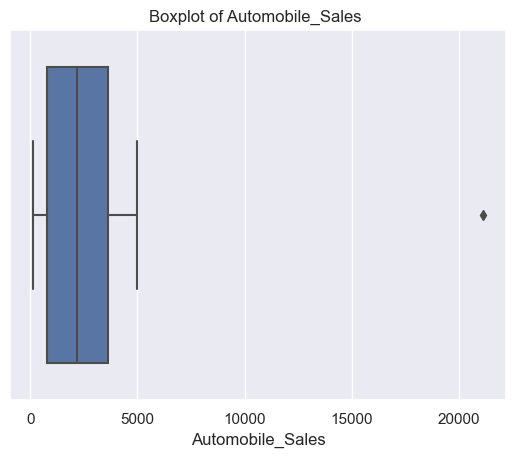

In [32]:
sns.boxplot(x=df['Automobile_Sales'])
plt.title('Boxplot of Automobile_Sales ')
plt.show()


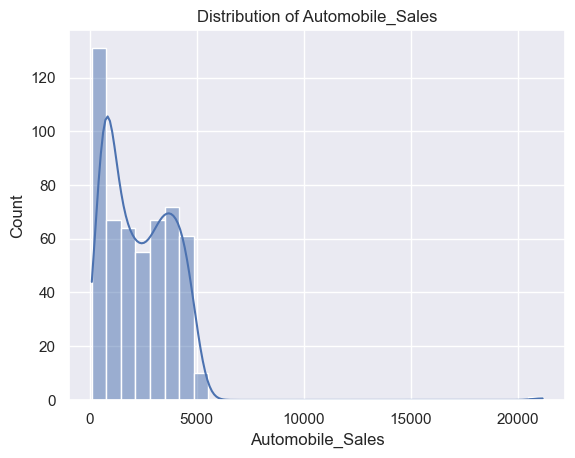

In [33]:
sns.histplot(df['Automobile_Sales'], kde=True)
plt.title('Distribution of Automobile_Sales')
plt.show()

In [34]:
df_no_outliers = df[(np.abs(z_scores) <= 3)]

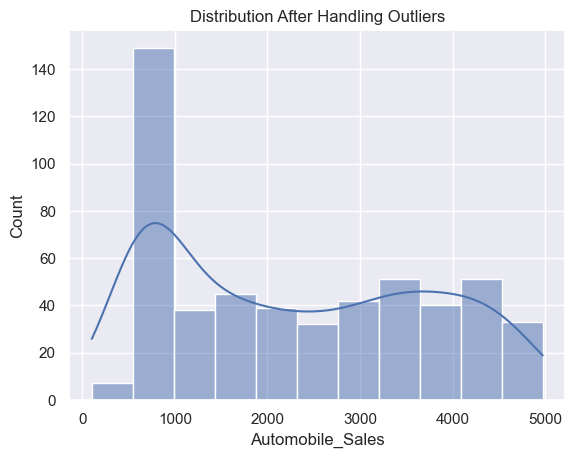

In [35]:
sns.histplot(df_no_outliers['Automobile_Sales'], kde=True)
plt.title('Distribution After Handling Outliers')
plt.show() 

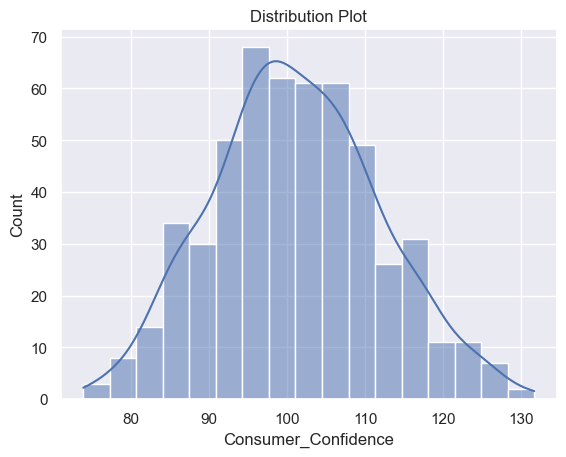

In [36]:
# Distribution plot for a numerical variable
sns.histplot(df['Consumer_Confidence'], kde=True)
plt.title('Distribution Plot')
plt.show()

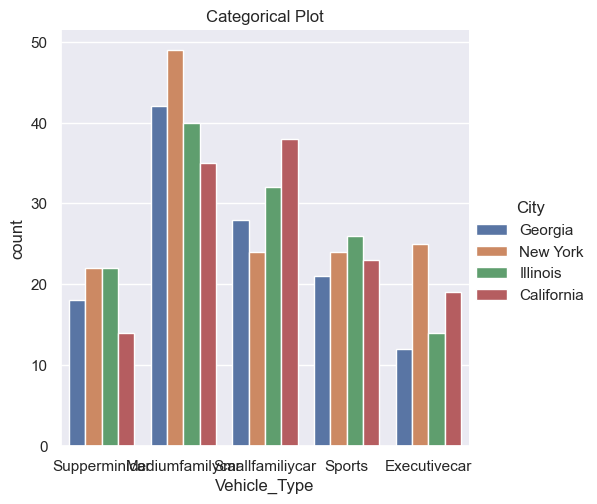

In [37]:
sns.catplot(x='Vehicle_Type', hue='City', kind='count', data=df)
plt.title('Categorical Plot')
plt.show()

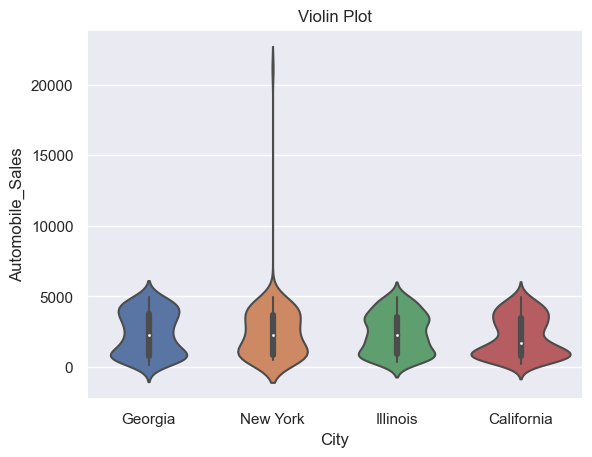

In [38]:
# Violin plot
sns.violinplot(x='City', y='Automobile_Sales', data=df)
plt.title('Violin Plot')
plt.show()


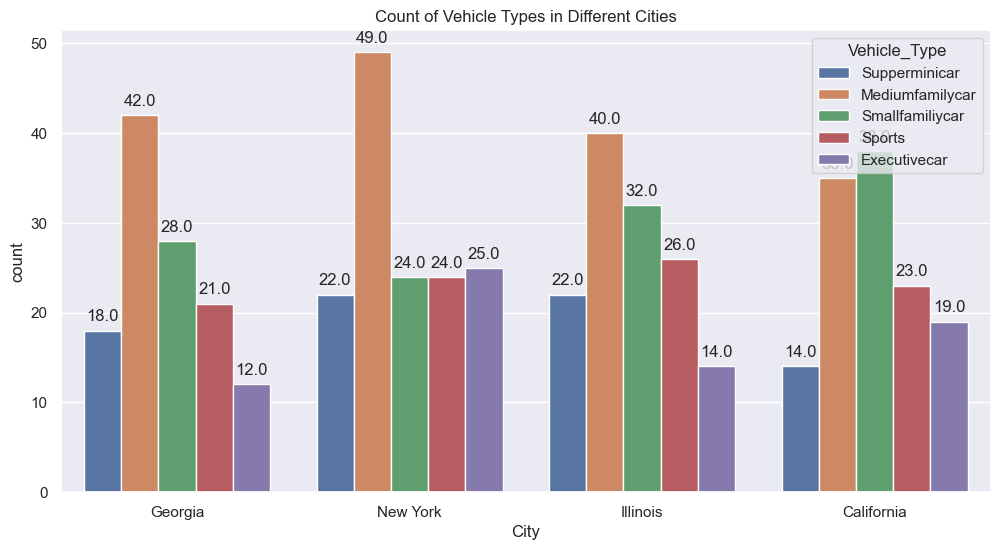

In [39]:
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(x='City', hue='Vehicle_Type', data=df)

# Display count values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of Vehicle Types in Different Cities')
plt.show()

In [40]:
# Correlation analysis-2
# we consider only numeric values in corr
# Explicitly set numeric_only to True
correlation_matrix = df.corr(numeric_only=True)


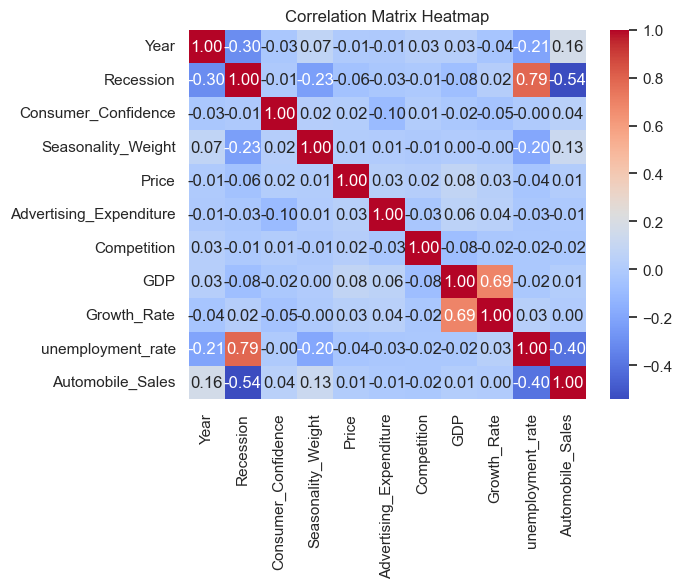

In [41]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
#strong corr= 1 or -1
#weak corr=0
print(correlation_matrix['Price'])


Year                      -0.005241
Recession                 -0.058306
Consumer_Confidence        0.018666
Seasonality_Weight         0.009738
Price                      1.000000
Advertising_Expenditure    0.031420
Competition                0.019960
GDP                        0.080561
Growth_Rate                0.033310
unemployment_rate         -0.035805
Automobile_Sales           0.012052
Name: Price, dtype: float64


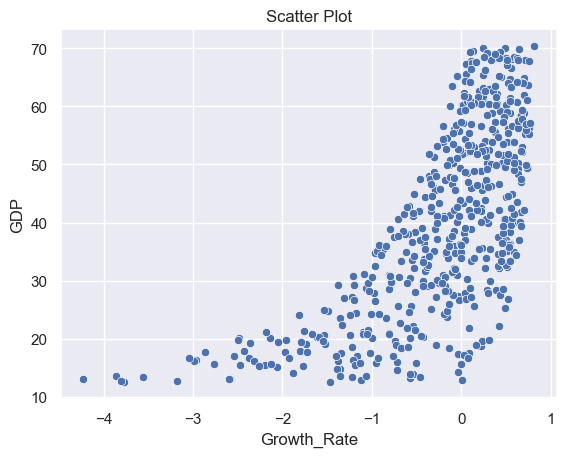

In [43]:
#scatter plot (linear or not check)
#linear or not
#scatter plot with straight line indicates linear relationship,scattered patten represent non-linearity
sns.scatterplot(x='Growth_Rate', y='GDP', data=df)
plt.title('Scatter Plot')
plt.show()


In [44]:
#normal distribution check
# Assuming df is your DataFrame and 'Growth_Rate' and 'GDP' are the two variables

# Assuming 'Variable1' and 'Variable2' are your variables
stat1, p_value1 = shapiro(df['Growth_Rate'])
stat2, p_value2 = shapiro(df['GDP'])

# Check for normal distribution in Variable1
if p_value1 > 0.05:
    print("Growth_Rate follows a normal distribution.")
else:
    print("Growth_Rate does not follow a normal distribution.")

# Check for normal distribution in Variable2
if p_value2 > 0.05:
    print("GDP follows a normal distribution.")
else:
    print(" does not follow a normal distribution.")



Growth_Rate does not follow a normal distribution.
 does not follow a normal distribution.


In [45]:
#The p-value of 0.6677 is greater than 0.05
#so,we reject the null hypothesis that there is no significant Spearman rank correlation.
# no significant evidence of a strong monotonic relationship between the two variables(Growth_Rate,GDP)

spearman_corr, p_value = spearmanr(df['Growth_Rate'], df['GDP'])

print(f"Spearman Rank Correlation: {spearman_corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant Spearman rank correlation.")
else:
    print("There is no significant Spearman rank correlation.")


Spearman Rank Correlation: 0.698465784878085
P-value: 1.8479955546073832e-78
There is a significant Spearman rank correlation.


In [46]:
#chi-square test


contingency_table = pd.crosstab(df['Vehicle_Type'], df['City'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the result
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Check if the result is significant
if p_value < 0.05:
    print("There is a significant relationship between Vehicle_Type and City.")
else:
    print("There is no significant relationship between Vehicle_Type and City.")


Chi-square Statistic: 12.228404406127343
P-value: 0.4275150016629436
Degrees of Freedom: 12
Expected Frequencies:
[[17.10227273 16.04166667 17.76515152 19.09090909]
 [40.55681818 38.04166667 42.12878788 45.27272727]
 [29.80681818 27.95833333 30.96212121 33.27272727]
 [22.96590909 21.54166667 23.85606061 25.63636364]
 [18.56818182 17.41666667 19.28787879 20.72727273]]
There is no significant relationship between Vehicle_Type and City.


In [47]:
#coverting the categorical column into numerical column for regression analysis
label_encoder = LabelEncoder()
categorical_columns = ['Vehicle_Type', 'City' ,'Month']

In [48]:
# Create a copy of the original dataframe to store the converted columns
d = df.copy()

In [49]:
# Apply label encoding to each specified categorical column
for col in categorical_columns:
    d[col] = label_encoder.fit_transform(df[col])

In [50]:
print(d)

           Date  Year  Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980      4          1               108.24   
1     2/29/1980  1980      3          1                98.75   
2     3/31/1980  1980      7          1               107.48   
3     4/30/1980  1980      0          1               115.01   
4     5/31/1980  1980      8          1                98.72   
..          ...   ...    ...        ...                  ...   
523   8/31/2023  2023      1          0               103.36   
524   9/30/2023  2023     11          0               101.55   
525  10/31/2023  2023     10          0               124.66   
526  11/30/2023  2023      9          0                97.09   
527  12/31/2023  2023      2          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     3048            4   
2  

In [51]:
d = d.drop(['Date'], axis=1)  # Drop non-numeric date column

In [52]:
print(d.columns)

Index(['Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


In [53]:
 #3-Regression(two techiques)
# suitable techiques for sales dataset for regression is Random Forest regression,linear regression
#Random Forest regression 
target_variable = 'Automobile_Sales'


In [54]:
# Use all numeric columns except the target variable as features

features = [col for col in d.columns if col != target_variable]

In [55]:
X_train = d[features]
y_train = d[target_variable]

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d[features], d[target_variable], test_size=0.2, random_state=42)

In [57]:
# Initialize the Random Forest Regressor
#n_estimators  is the no of tress default set 100 and randomseed
# Train the model on the training set

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


In [59]:
# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
rmse_rf = np.sqrt(mse_rf)
# Print or use the RMSE value as needed
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')

Mean Squared Error (Random Forest): 1190622.2083703778
Root Mean Squared Error (Random Forest): 1091.1563629335521


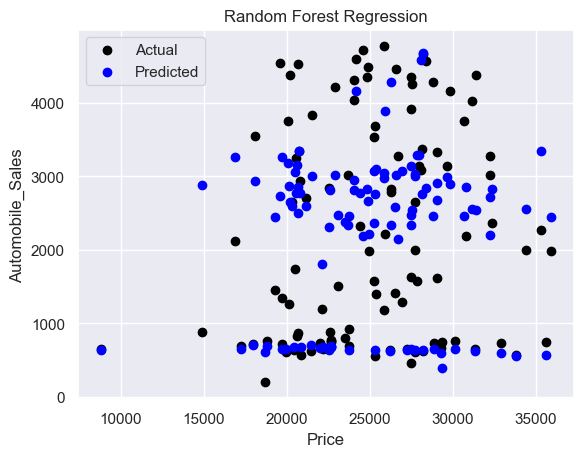

In [60]:
#Random Forest model predicts the target variable ('Automobile_Sales') based on the selected feature(price)
#For example, if your dataset has a column named 'Price' and you want to predict 'Automobile_Sales' based on it, you would replace 'Your_Selected_Feature' with 'Price':


plt.scatter(X_test['Price'], y_test, color='black', label='Actual')
plt.scatter(X_test['Price'], y_pred, color='blue', label='Predicted')
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.legend()
plt.title('Random Forest Regression')
plt.show()

In [61]:
#linear regression(numeric only used)
target_variable = 'Automobile_Sales'

In [62]:
# Use all numeric columns except the target variable as features

features = [col for col in d.columns if col != target_variable]

In [63]:
X_train = d[features]
y_train = d[target_variable]

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d[features], d[target_variable], test_size=0.2, random_state=42)

In [65]:
# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

In [67]:
# Evaluate model performance
mse_linear= mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_linear}')
rmse_rf = np.sqrt(mse_linear)
# Print or use the RMSE value as needed
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')


Mean Squared Error: 1173081.7882499346
Root Mean Squared Error (Random Forest): 1083.0890029217057


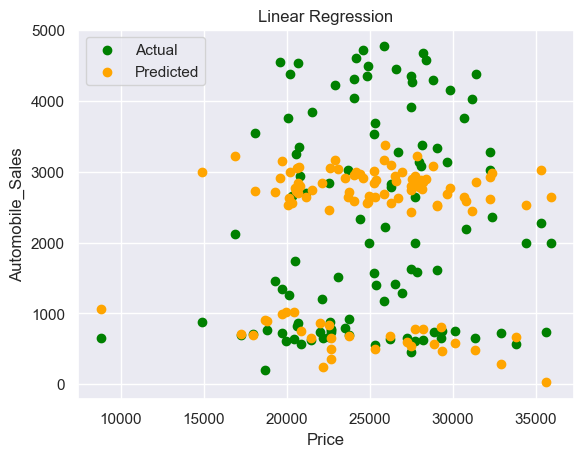

In [68]:
# Visualize the results
plt.scatter(X_test['Price'], y_test, color='green', label='Actual')
plt.scatter(X_test['Price'], y_pred, color='orange', label='Predicted')
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.legend()
plt.title('Linear Regression')
plt.show()


In [69]:
# Create a bar plot for MSE comparison
models = ['Random Forest', 'Linear Regression']
mse_values = [mse_rf, mse_linear]

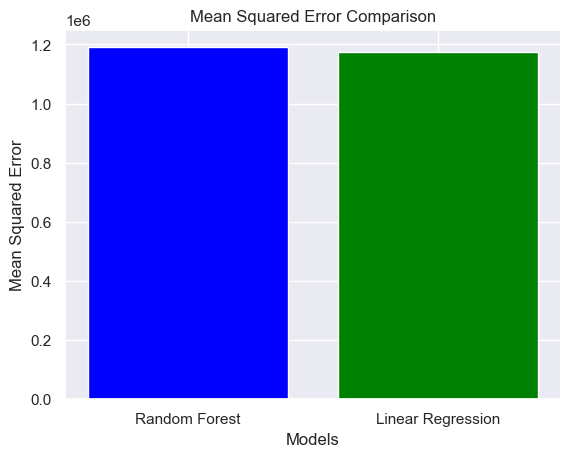

In [70]:
#The bar for "Linear Regression" is lower than the bar for "Random forest" 
#it indicates that the Linear Regression  model performed better in terms of minimizing squared errors on the test data.
#MSE measures the average squared difference between the predicted values and the actual values.
#A lower MSE indicates that, on average, the model's predictions are closer to the actual values.

plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

In [72]:
df = pd.read_csv("C:/Users/anant/OneDrive/SEMESTER 6/Data Mining/historical_automobile_sales.csv")

In [73]:
#coverting the categorical column into numerical column for regression analysis
label_encoder = LabelEncoder()
categorical_columns = ['Vehicle_Type', 'City' ,'Month']

In [74]:
# Create a copy of the original dataframe to store the converted columns
d = df.copy()

In [75]:
# Apply label encoding to each specified categorical column
for col in categorical_columns:
    d[col] = label_encoder.fit_transform(df[col])print(d)

SyntaxError: invalid syntax (3237237444.py, line 3)

In [76]:
d = d.drop(['Date'], axis=1)

In [77]:
print(d)

     Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0    1980   Jan          1               108.24                0.50   
1    1980   Feb          1                98.75                0.75   
2    1980   Mar          1               107.48                0.20   
3    1980   Apr          1               115.01                1.00   
4    1980   May          1                98.72                0.20   
..    ...   ...        ...                  ...                 ...   
523  2023   Aug          0               103.36                0.25   
524  2023   Sep          0               101.55                0.07   
525  2023   Oct          0               124.66                0.12   
526  2023   Nov          0                97.09                0.25   
527  2023   Dec          0                95.92                0.34   

         Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0    27483.571                     1558            7  60.223     0.010

In [78]:
print(d.columns)

Index(['Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
import pandas as pd 
import numpy as np

In [120]:
def calculate_entropy(data):
    # Calculate the entropy of a dataset
    labels = data['Automobile_Sales']
    unique_labels = np.unique(labels)
    entropy = 0
    for label in unique_labels:
        prob = np.sum(labels == label) / len(labels)
        entropy -= prob * np.log2(prob)
    return entropy

In [121]:
# Call calculate_entropy function and print its value
entropy_value = calculate_entropy(d)
print("Entropy Value:", entropy_value)

Entropy Value: 9.029242604206843


In [122]:
def calculate_information_gain(data, attribute):
    # Calculate information gain for a given attribute
    entropy_before_split = calculate_entropy(data)
    unique_values = np.unique(data[attribute])
    entropy_after_split = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        entropy_after_split += (len(subset) / len(data)) * calculate_entropy(subset)
    information_gain = entropy_before_split - entropy_after_split
    return information_gain


In [123]:
# Call calculate_information_gain function and print its value
information_gain = calculate_information_gain(d, feature)
print("Information Gain:", information_gain)


Information Gain: 5.4442801034856885


In [124]:
def calculate_split_information(data, attribute):
    # Calculate split information for a given attribute
    unique_values = np.unique(data[attribute])
    split_information = 0
    for value in unique_values:
        prob = np.sum(data[attribute] == value) / len(data)
        split_information -= prob * np.log2(prob)
    return split_information

In [125]:
def calculate_gain_ratio(data, attribute):
    # Calculate gain ratio for a given attribute
    information_gain = calculate_information_gain(data, attribute)
    split_information = calculate_split_information(data, attribute)
    if split_information == 0:
        gain_ratio = 0  # Avoid division by zero
    else:
        gain_ratio = information_gain / split_information
    return gain_ratio


In [126]:
df = pd.read_csv("C:/Users/anant/OneDrive/SEMESTER 6/Data Mining/historical_automobile_sales.csv")

In [127]:
label_encoder = LabelEncoder()
categorical_columns = ['Vehicle_Type', 'City' ,'Month']

In [128]:
d = df.copy()
for col in categorical_columns:
    d[col] = label_encoder.fit_transform(df[col])

In [129]:
d = d.drop(['Date'], axis=1)

In [130]:
target_variable = 'Automobile_Sales'
features = [col for col in d.columns if col != target_variable]


In [131]:
# Calculate gain ratio for each feature
gain_ratios = {}
for feature in features:
    gain_ratios[feature] = calculate_gain_ratio(d, feature)
    print(f"Gain ratio for {feature}: {gain_ratios[feature]}")

Gain ratio for Year: 0.9972247083194735
Gain ratio for Month: 0.9957735917325322
Gain ratio for Recession: 0.9999999999998296
Gain ratio for Consumer_Confidence: 0.9982959453836869
Gain ratio for Seasonality_Weight: 0.9951097136237165
Gain ratio for Price: 0.9983247617306851
Gain ratio for Advertising_Expenditure: 0.998300562548111
Gain ratio for Competition: 0.995946034784043
Gain ratio for GDP: 0.9983226542653609
Gain ratio for Growth_Rate: 0.9983247617306851
Gain ratio for unemployment_rate: 0.997016578754909
Gain ratio for Vehicle_Type: 0.9932524182445238
Gain ratio for City: 0.9943100141863631


In [132]:
# Sort features by gain ratio in descending order
sorted_features = sorted(gain_ratios, key=gain_ratios.get, reverse=True)
print("Feature priorities based on Gain Ratio:")
for feature in sorted_features:
    print(f"{feature}: {gain_ratios[feature]}")


Feature priorities based on Gain Ratio:
Recession: 0.9999999999998296
Price: 0.9983247617306851
Growth_Rate: 0.9983247617306851
GDP: 0.9983226542653609
Advertising_Expenditure: 0.998300562548111
Consumer_Confidence: 0.9982959453836869
Year: 0.9972247083194735
unemployment_rate: 0.997016578754909
Competition: 0.995946034784043
Month: 0.9957735917325322
Seasonality_Weight: 0.9951097136237165
City: 0.9943100141863631
Vehicle_Type: 0.9932524182445238


In [133]:
target_variable = 'Automobile_Sales'

In [134]:
features = [col for col in d.columns if col != target_variable]

In [135]:
num_classes = 5 
labels = pd.cut(y_train, bins=num_classes, labels=range(num_classes))

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d[features], d[target_variable], test_size=0.2, random_state=42)

In [137]:
d.head()

,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980,4,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,4,1
1,1980,3,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,4,3
2,1980,7,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,1,3
3,1980,0,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,4,2
4,1980,8,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,2,0


In [138]:

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, labels)  # Use the discretized labels for training


DecisionTreeClassifier()

In [139]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [140]:
y_test_int = y_test.astype(int)

In [141]:
# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test_int, y_pred))

Accuracy: 0.0


In [142]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.35103155339805825, 0.9736842105263158, 'x[2] <= 0.5\ngini = 0.191\nsamples = 422\nvalue = [377, 44, 1]'),
 Text(0.3316140776699029, 0.9210526315789473, 'x[6] <= 4972.5\ngini = 0.23\nsamples = 340\nvalue = [295, 44, 1]'),
 Text(0.3121966019417476, 0.868421052631579, 'x[3] <= 115.815\ngini = 0.227\nsamples = 339\nvalue = [295, 43, 1]'),
 Text(0.29277912621359226, 0.8157894736842105, 'x[3] <= 115.455\ngini = 0.249\nsamples = 304\nvalue = [260, 43, 1]'),
 Text(0.27336165048543687, 0.7631578947368421, 'x[9] <= 0.751\ngini = 0.244\nsamples = 303\nvalue = [260, 43, 0]'),
 Text(0.2345266990291262, 0.7105263157894737, 'x[5] <= 39497.625\ngini = 0.236\nsamples = 300\nvalue = [259, 41, 0]'),
 Text(0.21510922330097088, 0.6578947368421053, 'x[5] <= 16320.314\ngini = 0.232\nsamples = 299\nvalue = [259, 40, 0]'),
 Text(0.038834951456310676, 0.6052631578947368, 'x[8] <= 29.821\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.019417475728155338, 0.5526315789473685, 'gini = 0.0\nsamples 

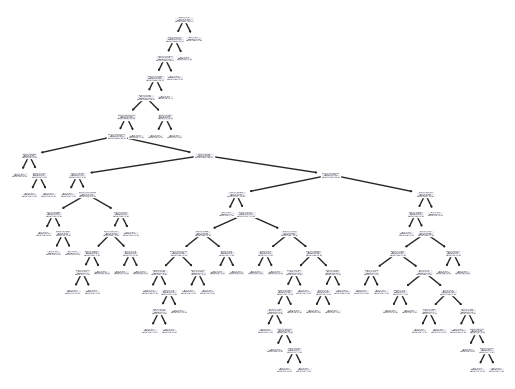

In [143]:
tree.plot_tree(clf)

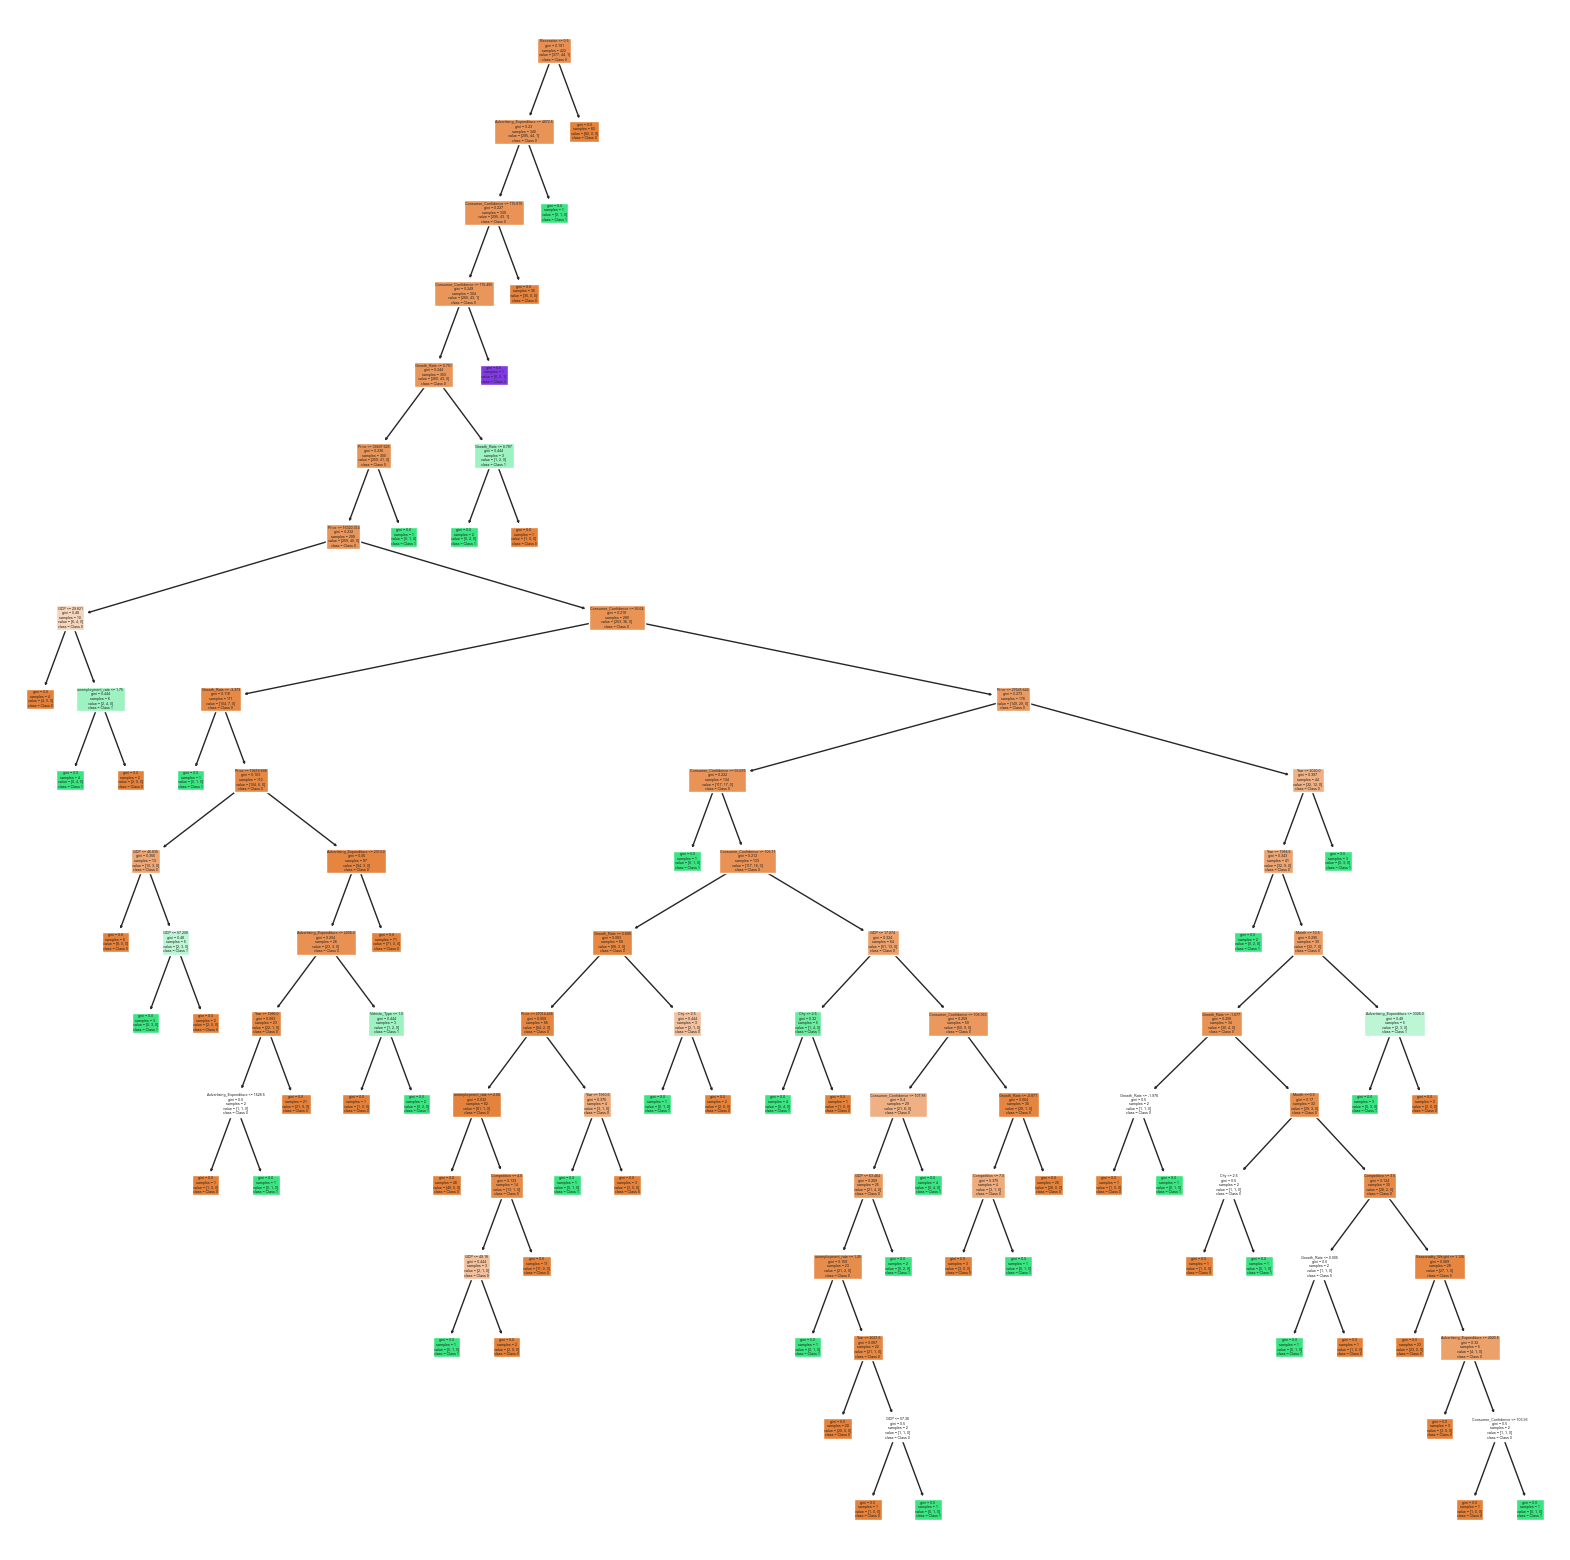

In [144]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
plot_tree(clf, feature_names=features, class_names=["Class 0", "Class 1", "Class 2"], filled=True)
plt.show()


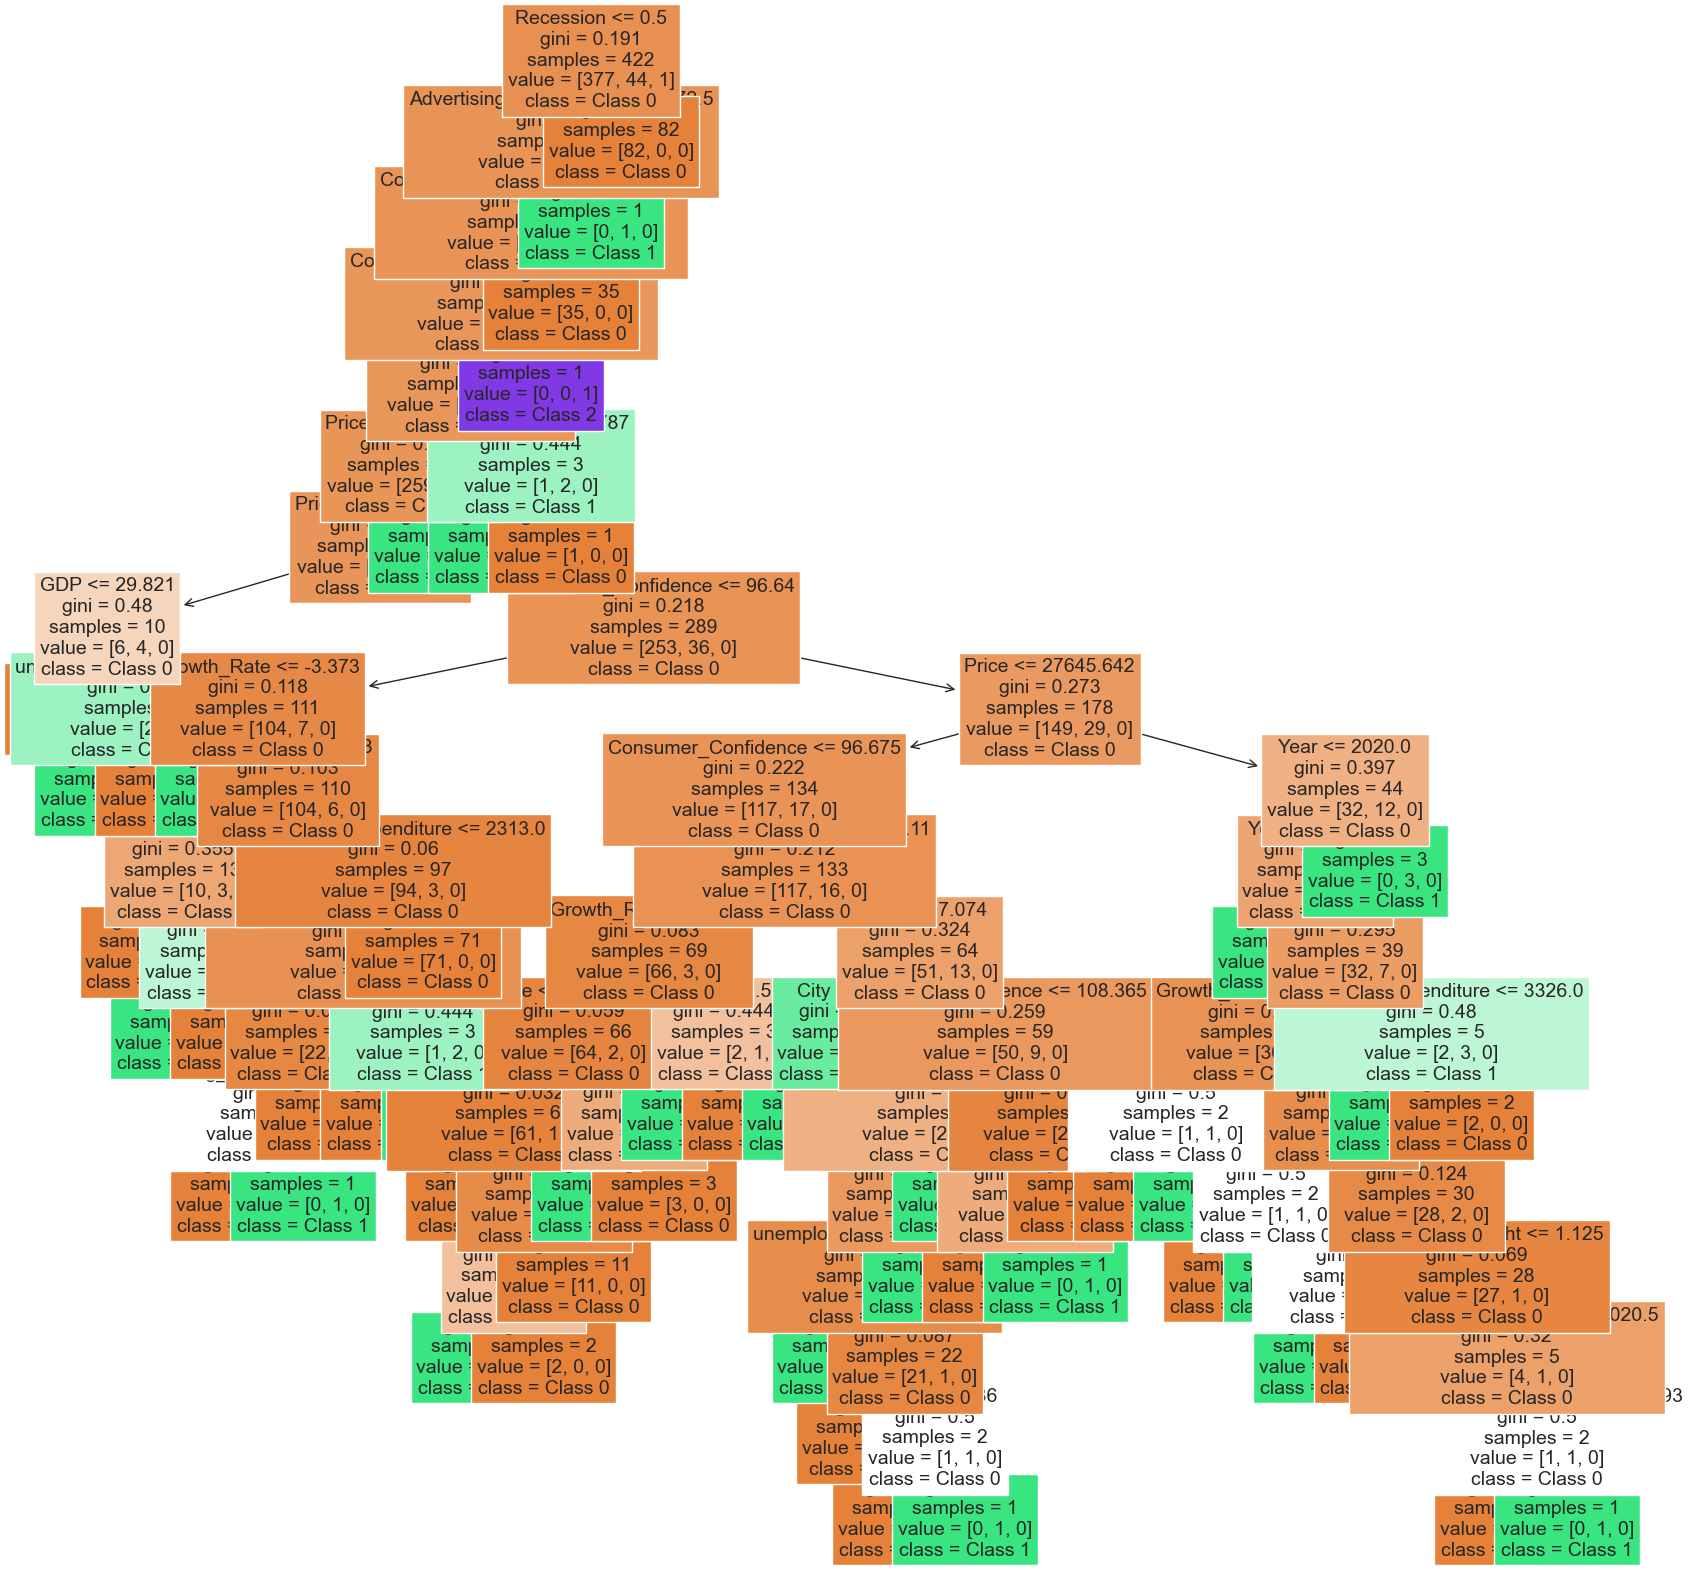

In [145]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree with larger font size
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
plot_tree(clf, feature_names=features, class_names=["Class 0", "Class 1", "Class 2"], filled=True, fontsize=14)
plt.show()

In [146]:
#Normalization and standarization
#using only numerical values
import pandas as pd
import numpy as np

In [147]:
# 1. Min-Max Normalization
#used to scale numerical data to a fixed range, typically between 0 and 1.useful for bringing all features to a similar scale
#function definition for min_.with the argument data finding the min and max for each column
def min_max_normalization(data):
    min_vals = data.min()   
    max_vals = data.max()
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

In [148]:
data_min_max_normalized = min_max_normalization(d)

In [149]:
print("\nMin-Max Normalized Data:")
print(data_min_max_normalized.head())


Min-Max Normalized Data:
   Year     Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0   0.0  0.363636        1.0             0.594426            0.333333   
1   0.0  0.272727        1.0             0.430154            0.500000   
2   0.0  0.636364        1.0             0.581271            0.133333   
3   0.0  0.000000        1.0             0.711615            0.666667   
4   0.0  0.727273        1.0             0.429635            0.133333   

      Price  Advertising_Expenditure  Competition       GDP  Growth_Rate  \
0  0.526922                 0.138148     0.666667  0.824577     0.840348   
1  0.437412                 0.513085     0.166667  0.578544     0.776970   
2  0.548204                 0.535481     0.000000  0.391128     0.777164   
3  0.671595                 0.162053     0.666667  0.573134     0.884094   
4  0.423895                 0.078007     0.166667  0.699703     0.865770   

   unemployment_rate  Automobile_Sales  Vehicle_Type      City  
0            

In [150]:
# 2. Z-score Standardization
# also known as Standard Score or Standardization. easier to compare variables 
# is used to transform data so that it has a mean of 0 and a standard deviation of 1. 
def z_score_standardization(data):
    mean = data.mean()
    std_dev = data.std()
    standardized_data = (data - mean) / std_dev
    return standardized_data

data_z_score_standardized = z_score_standardization(d)

In [151]:
print("\nZ-score Standardized Data:")
print(data_z_score_standardized.head())



Z-score Standardized Data:
       Year     Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0 -1.691519 -0.434112   1.914578             0.669722           -0.166775   
1 -1.691519 -0.723521   1.914578            -0.225463            0.383308   
2 -1.691519  0.434112   1.914578             0.598032           -0.826875   
3 -1.691519 -1.591746   1.914578             1.308332            0.933392   
4 -1.691519  0.723521   1.914578            -0.228293           -0.826875   

      Price  Advertising_Expenditure  Competition       GDP  Growth_Rate  \
0  0.515250                -1.324590     0.475325  1.239966     0.292593   
1 -0.134268                -0.017074    -1.048794  0.363828    -0.078481   
2  0.669681                 0.061026    -1.556834 -0.303569    -0.077343   
3  1.565066                -1.241225     0.475325  0.344566     0.548722   
4 -0.232353                -1.534320    -1.048794  0.795281     0.441439   

   unemployment_rate  Automobile_Sales  Vehicle_Type

In [152]:
# 3. Robust Scaling
def robust_scaling(data):
    median = data.median()
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    scaled_data = (data - median) / (q75 - q25)
    return scaled_data

data_robust_scaled = robust_scaling(d)

In [153]:
print("\nRobust Scaled Data:")

print(data_robust_scaled.head())


Robust Scaled Data:
   Year     Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  -1.0 -0.272727        inf             0.527983                 0.0   
1  -1.0 -0.454545        inf            -0.140092                 0.5   
2  -1.0  0.272727        inf             0.474481                -0.6   
3  -1.0 -1.000000        inf             1.004576                 1.0   
4  -1.0  0.454545        inf            -0.142203                -0.6   

      Price  Advertising_Expenditure  Competition       GDP  Growth_Rate  \
0  0.366088                -0.763201         0.25  0.799745     0.024053   
1 -0.109310                -0.012098        -0.50  0.257775    -0.307827   
2  0.479121                 0.032766        -0.75 -0.155069    -0.306809   
3  1.134475                -0.715312         0.25  0.245860     0.253129   
4 -0.181100                -0.883680        -0.50  0.524668     0.157177   

   unemployment_rate  Automobile_Sales  Vehicle_Type  City  
0           2.384615  

In [154]:

# 4. Log Transformation
data_log_transformed = d.apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)
print("\nLog Transformed Data:")
print(data_log_transformed.head())


Log Transformed Data:
       Year     Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  7.591357  1.609438   0.693147             4.693547            0.405465   
1  7.591357  1.386294   0.693147             4.602667            0.559616   
2  7.591357  2.079442   0.693147             4.686566            0.182322   
3  7.591357  0.000000   0.693147             4.753676            0.693147   
4  7.591357  2.197225   0.693147             4.602366            0.182322   

       Price  Advertising_Expenditure  Competition       GDP  Growth_Rate  \
0  10.221380                 7.351800     2.079442  4.114523     0.009950   
1  10.098630                 8.022569     1.609438  3.849850    -0.370476   
2  10.248475                 8.051341     1.386294  3.587428    -0.369057   
3  10.392563                 7.410952     2.079442  3.843166     0.207498   
4  10.078710                 7.185387     1.609438  3.988928     0.129445   

   unemployment_rate  Automobile_Sales  Vehicle_Typ

C:\Users\anant\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
import pandas as pd 

In [5]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv("C:/Users/anant/OneDrive/SEMESTER 6/Data Mining/historical_automobile_sales.csv")

In [9]:
label_encoder = LabelEncoder()
categorical_columns = ['Vehicle_Type', 'City' ,'Month']

In [10]:
d = df.copy()
for col in categorical_columns:
    d[col] = label_encoder.fit_transform(df[col])

In [11]:
d = d.drop(['Date'], axis=1)

In [12]:
d.head()

,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980,4,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,4,1
1,1980,3,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,4,3
2,1980,7,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,1,3
3,1980,0,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,4,2
4,1980,8,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,2,0


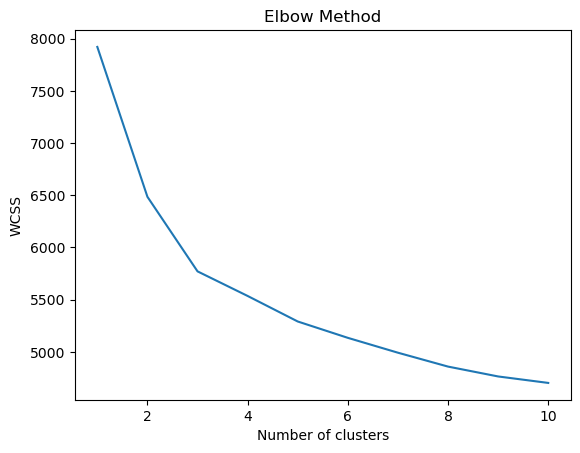

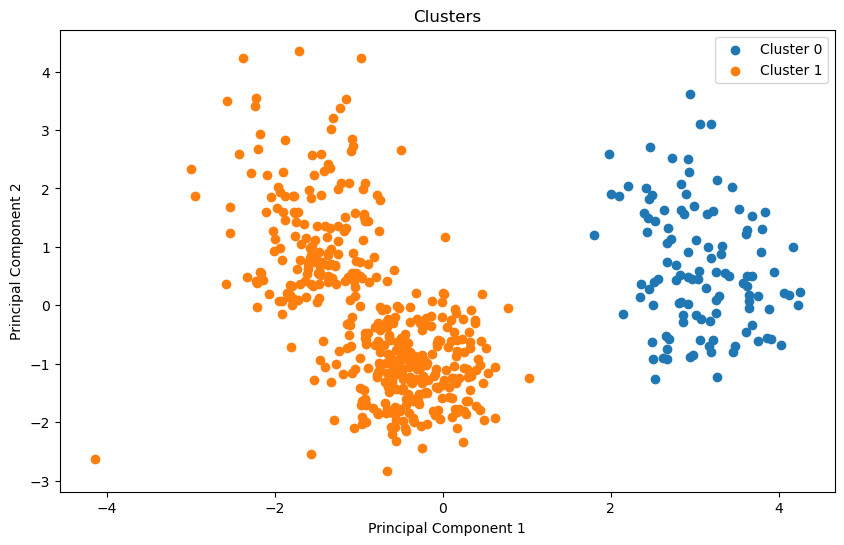

In [14]:
#clustering
#used for clustering data into groups or clusters based on similarities. 

import os
os.environ['OMP_NUM_THREADS'] = '1'

# Now, you can run your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


# Preprocessing: Standardize the data
# ensures that all features have a mean of 0 and a standard deviation of 1, 
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(d_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering with the optimal number of clusters
optimal_num_clusters = 2  # Choose based on the Elbow Method or Silhouette Method
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(d_scaled)

# Add cluster labels to the original data
d['Cluster'] = kmeans.labels_

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(d_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, d[['Cluster']]], axis=1)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_num_clusters):
    cluster_data = final_df[final_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

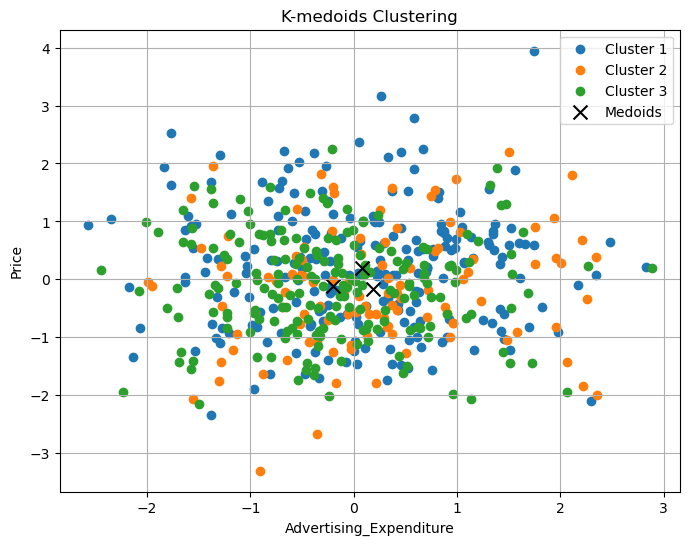

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load the dataset
df = pd.read_csv("C:/Users/anant/OneDrive/SEMESTER 6/Data Mining/historical_automobile_sales.csv")

selected_columns = ['Consumer_Confidence', 'Price', 'Advertising_Expenditure', 'Competition', 'GDP','Growth_Rate', 'unemployment_rate']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# K-medoids algorithm using scipy
def kmedoids(X, n_clusters, max_iter=100):
    
    medoids_idx = np.random.choice(X.shape[0], n_clusters, replace=False)
    medoids = X[medoids_idx]

    for _ in range(max_iter):
        # Calculate pairwise distances between data points and medoids
        distances = cdist(X, medoids, metric='euclidean')

        # Assign each point to the nearest medoid
        labels = np.argmin(distances, axis=1)

        # Update medoids
        new_medoids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])

        # Check for convergence 
        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return labels, medoids

# Perform K-medoids clustering
n_clusters = 3
max_iter = 100 
cluster_labels, cluster_medoids = kmedoids(df_scaled, n_clusters, max_iter=max_iter)

df['cluster'] = cluster_labels

print(df.head())


import matplotlib.pyplot as plt

# Plotting the clusters
def plot_clusters(X, labels, medoids):
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(labels))):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i+1}')
    plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='x', s=100, label='Medoids')
    plt.xlabel('Advertising_Expenditure')
    plt.ylabel('Price')
    plt.title('K-medoids Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()                 

# Call the function to plot clusters
plot_clusters(df_scaled[:, :2], cluster_labels, cluster_medoids[:, :2])
